In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

In [2]:
# Load the dataset
file_path = '/content/world_wide_self_harm_and_substance_deaths.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows to understand the data
data.head()

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,GBR,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,GBR,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,GBR,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,GBR,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom


In [4]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", data.shape)

# Get basic information about the dataset
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (48631, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48631 entries, 0 to 48630
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    48631 non-null  int64  
 1   Cause                   48631 non-null  object 
 2   Age_Range               48631 non-null  object 
 3   ISO_Code                48631 non-null  object 
 4   Sex                     48631 non-null  object 
 5   Deaths                  48631 non-null  int64  
 6   Age_and_Sex_Population  28987 non-null  float64
 7   Country                 48631 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.0+ MB

Missing Values:
Year                          0
Cause                         0
Age_Range                     0
ISO_Code                      0
Sex                           0
Deaths                        0
Age_and_Sex_Population    19644
Country                       0
d

In [5]:
# Check how missing values are distributed
missing_data = data[data['Age_and_Sex_Population'].isnull()]

# Display a few rows with missing population data
missing_data.head()

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
42,2017,Intentional self-harm,85-89,GBR,Female,36,NaN,United Kingdom
43,2017,Intentional self-harm,85-89,GBR,Male,108,NaN,United Kingdom
44,2017,Intentional self-harm,90-94,GBR,Female,22,NaN,United Kingdom
45,2017,Intentional self-harm,90-94,GBR,Male,52,NaN,United Kingdom
46,2017,Intentional self-harm,95+,GBR,Female,8,NaN,United Kingdom


In [7]:
# Fill missing population data with the median of the column
median_population = data['Age_and_Sex_Population'].median()
data.loc[:, 'Age_and_Sex_Population'] = data['Age_and_Sex_Population'].fillna(median_population)


# Confirm missing values are handled
print("Missing Values After Filling:")
print(data.isnull().sum())

Missing Values After Filling:
Year                      0
Cause                     0
Age_Range                 0
ISO_Code                  0
Sex                       0
Deaths                    0
Age_and_Sex_Population    0
Country                   0
dtype: int64


In [8]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
data = data.drop_duplicates()

# Confirm removal
print(f"Duplicates after cleaning: {data.duplicated().sum()}")

Number of duplicate rows: 0
Duplicates after cleaning: 0


In [17]:
# Get summary statistics for numerical columns
data.describe()

,Year,Deaths,Age_and_Sex_Population
count,48631.000000,48631.000000,4.863100e+04
mean,2018.494212,87.829039,1.027096e+06
std,1.240221,772.986446,7.341489e+06
min,2017.000000,0.000000,0.000000e+00
25%,2017.000000,0.000000,1.189430e+05
50%,2018.000000,1.000000,1.788185e+05
75%,2019.000000,17.000000,2.616170e+05
max,2021.000000,48312.000000,3.359420e+08


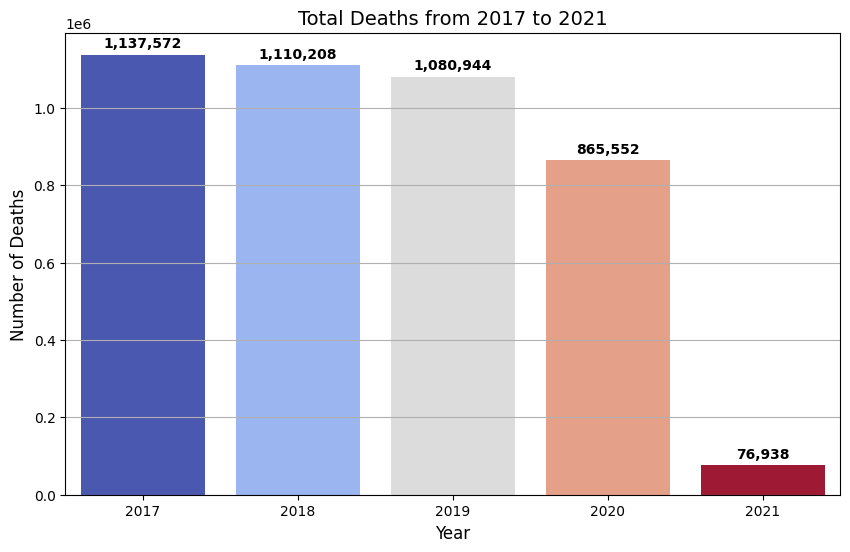

In [18]:
# Bar Chart with Data Labels (No Warning)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=deaths_per_year.index, y=deaths_per_year.values, hue=deaths_per_year.index, palette='coolwarm', legend=False)
plt.title('Total Deaths from 2017 to 2021', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.grid(axis='y')

# Adding data labels on top of each bar
for i, v in enumerate(deaths_per_year.values):
    ax.text(i, v + 10000, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

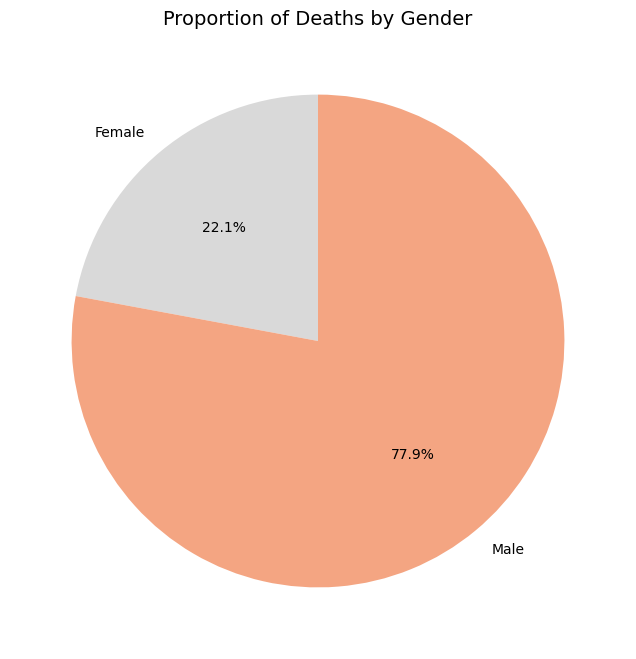

In [26]:
# Filter out both 'All' and 'Unspecified' categories
deaths_by_gender_filtered = deaths_by_gender.drop(['All', 'Unspecified'])

# Adjusted color palette for softer tones
custom_colors = ['#d9d9d9', '#f4a582']  # Light Gray, Soft Orange

# Pie Chart with Matched Colors
plt.figure(figsize=(8, 8))
plt.pie(deaths_by_gender_filtered.values,
        labels=deaths_by_gender_filtered.index,
        autopct='%1.1f%%',
        colors=custom_colors,
        startangle=90)

plt.title('Proportion of Deaths by Gender', fontsize=14)
plt.show()

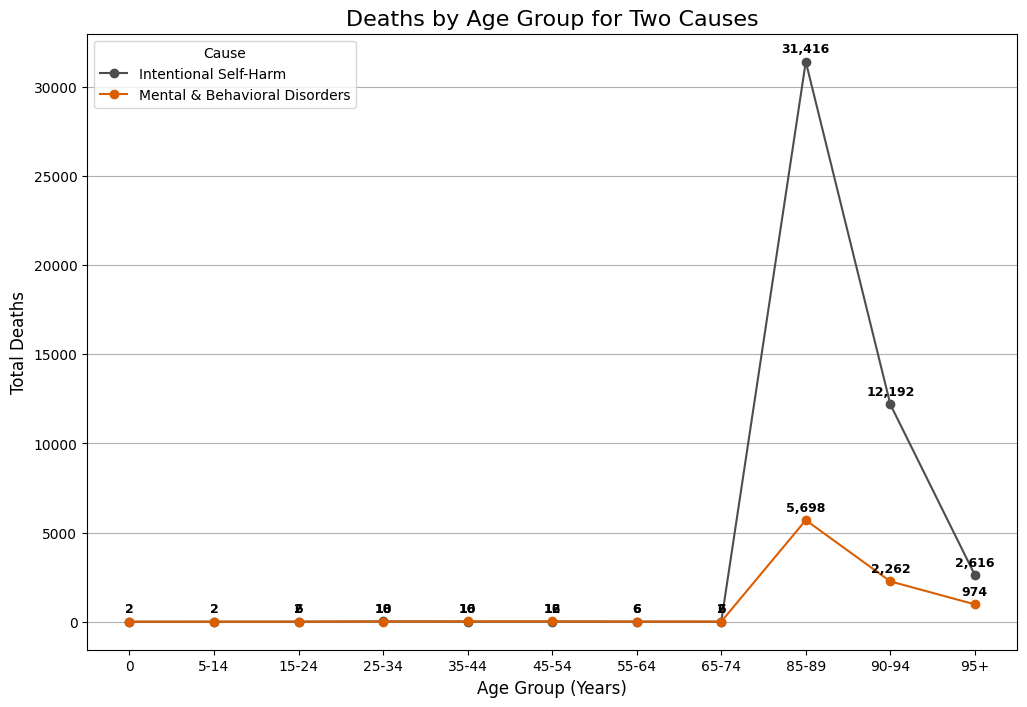

In [37]:
dark_gray = '#4d4d4d'       # Dark Gray
dark_orange = '#d95f02'     # Dark Orange

# Line Plot with Darker Colors and Data Labels
plt.figure(figsize=(12, 8))

# Plotting with darker colors
plt.plot(deaths_by_age_cause.index, deaths_by_age_cause['Intentional self-harm'], 'o-', label='Intentional Self-Harm', color=dark_gray)
plt.plot(deaths_by_age_cause.index, deaths_by_age_cause['Mental and behavioural disorders due to psychoactive substance use'], 'o-', label='Mental & Behavioral Disorders', color=dark_orange)

# Adding data labels
for i, value in enumerate(deaths_by_age_cause['Intentional self-harm']):
    if value > 0:
        plt.text(i, value + 500, f'{int(value):,}', ha='center', fontsize=9, fontweight='bold', color='black')

for i, value in enumerate(deaths_by_age_cause['Mental and behavioural disorders due to psychoactive substance use']):
    if value > 0:
        plt.text(i, value + 500, f'{int(value):,}', ha='center', fontsize=9, fontweight='bold', color='black')

# Customizing the plot
plt.title('Deaths by Age Group for Two Causes', fontsize=16)
plt.xlabel('Age Group (Years)', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.grid(axis='y')

plt.legend(title='Cause')
plt.show()

In [50]:
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    deaths_by_country,
    locations='Country',
    locationmode='country names',
    color='Deaths',
    color_continuous_scale=px.colors.sequential.Oranges[::-1],  # Correct color scale for map
    title='Overall Global Deaths by Country'
)

# Fix the color bar (legend)
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Deaths',
        tickvals=[0, 250000, 500000, 750000, 1000000],  # Custom tick values
        ticktext=['1M', '750k', '500k', '250k', '0'],   # Reverse the tick labels
    ),
    width=1300,
    height=700
)

fig.show()

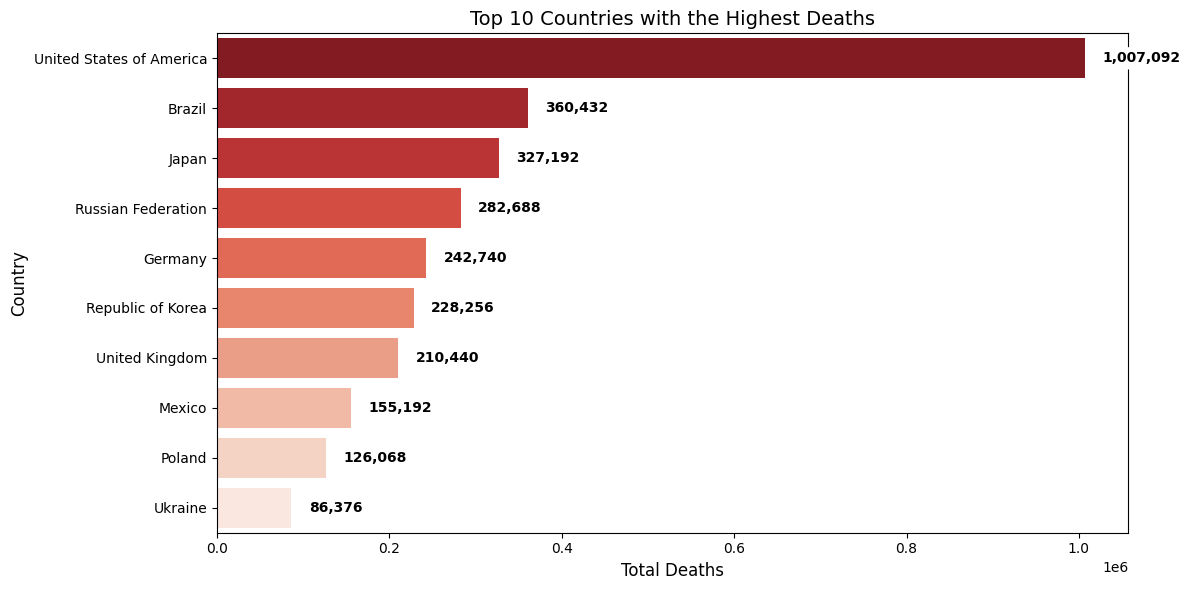

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
top_10_countries = data.groupby("Country")["Deaths"].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_10_countries.values,
    y=top_10_countries.index,
    hue=top_10_countries.index,  # Fix warning by explicitly assigning hue
    palette="Reds_r",
    dodge=False,  # Ensure bars don't stack
    legend=False  # Remove unnecessary legend
)

# Adding data labels with background to avoid overlap
for index, value in enumerate(top_10_countries.values):
    plt.text(value + (max(top_10_countries.values) * 0.02), index,  # Move further right
             f'{value:,.0f}',
             va='center', ha='left', fontsize=10, fontweight='bold', color='black',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))  # Add a background box

# Titles and labels
plt.title("Top 10 Countries with the Highest Deaths", fontsize=14)
plt.xlabel("Total Deaths", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.tight_layout()
plt.show()